# Домашка по теории вероятностей

дата: 20 декабря 2016

Выполняла: Филюшина Мария

### Задание 1

Я изучала массив данных с www.kaggle.com, где были даны результаты опроса более 300 молодых людей (о здоровьи, учебе, употреблении алкоголя и т. д.). Взглянем на таблицу, с которой я работала: 

In [4]:
import pandas as pd
import matplotlib
import seaborn as sns
import scipy.stats as stat
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pandas import read_csv
from pandas import date_range,Series,DataFrame,read_csv, qcut
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
from numpy.random import randn
from pylab import *
from matplotlib import rcParams
Teens = pd.read_csv("/Users/Filushina/Downloads/student-mat.csv") 
Teens.head(10)

,Index,sex,Age,studytime,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,1,F,18,2,no,no,4,3,4,1,1,3
1,2,F,17,2,yes,no,5,3,3,1,1,3
2,3,F,15,2,yes,no,4,3,2,2,3,3
3,4,F,15,3,yes,yes,3,2,2,1,1,5
4,5,F,16,2,no,no,4,3,2,1,2,5
5,6,M,16,2,yes,no,5,4,2,1,2,5
6,7,M,16,2,yes,no,4,4,4,1,1,3
7,8,F,17,2,no,no,4,1,4,1,1,1
8,9,M,15,2,yes,no,4,2,2,1,1,1
9,10,M,15,2,yes,no,5,5,1,1,1,5


#### Массив данных содержит 9 параметров:

sex - пол

age - возраст

studytime - загруженность учебой (еженедельно: 1 - менее 2 часов, 2 - от 2 до 5 часов, 3 - от пяти до 10 часов, or 4 - от 10 часов)

famrel - качество взаимоотношений в семье (от 1 до 5, где 1 - очень плохое, 5 - очень хорошее)

freetime - свободное время после учебы (от 1 до 5)

goout - частота прогулок с друзьями (от 1 до 5 по степени частоты)

Dalc - потребление алкоголя по будням (от 1 до 5 по степени частоты)

Walc - потребление алкоголя по выходным (от 1 до 5 по степени частоты)

health - уровень здоровья (от 1 до 5, где 1 - очень плохое, 5 - очень хорошее)


Для начала посмотрим на возраст, пол и количество опрошенных:

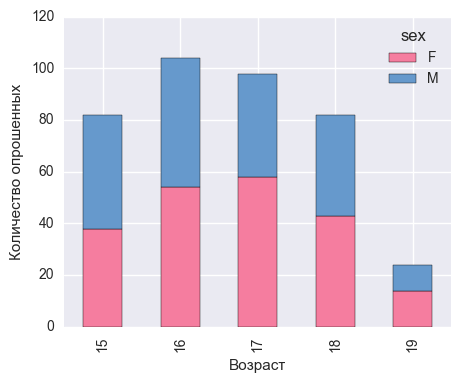

In [5]:
%matplotlib inline
sns.set()
Teens.pivot_table('Index', 'Age', 'sex','count').plot(color=('#f57d9f','#6699cc'),kind='bar',figsize=(5,4),stacked=True)
plt.ylabel('Количество опрошенных');
plt.xlabel('Возраст');

Видим, что распределение по возрасту далеко не равномерное и среди опрошенных явно больше женщин. 

Теперь построим плотность распределения опрошенных по степени загруженности учебой (от 1 до 5):

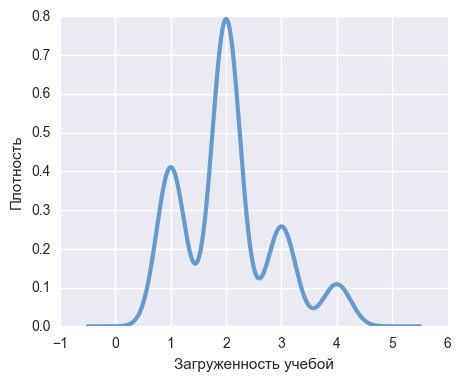

In [6]:

Teens['studytime'].plot(kind='kde',linewidth=3,figsize=(5,4),color='#6699cc');
plt.ylabel('Плотность');
plt.xlabel('Загруженность учебой');

Хочу сравнить эту плотность с плотностью для только 15-летних опрошенных 

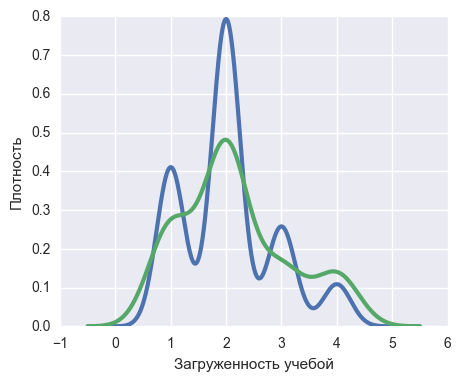

In [7]:
Teens['studytime'].plot(kind='kde', linewidth=3, figsize=(5,4));
Teens['studytime'][Teens['Age']==15].plot(kind='kde', linewidth=3);
plt.ylabel('Плотность');
plt.xlabel('Загруженность учебой');

По графику неочевидно, кто из них больше или меньше занят, так как в опросе даны дискретные ответы, но четко ясно, что большая часть опрошенных (в том числе среди 15-летних) оценивает свою загруженность от 2 до 5 часов в неделю (явно не ученики Вышки отвечали).

Далее взглянем на количество свободного времени (по шкале от 1 до 5) по возрастным группам.

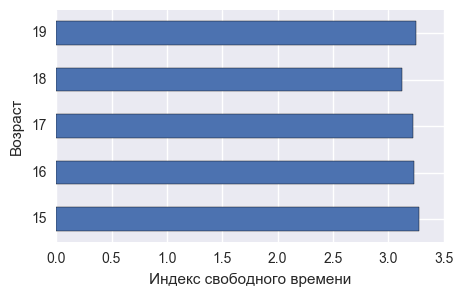

In [8]:
Teens.pivot_table( 'freetime','Age',).plot(kind='barh',figsize=(5,3), stacked=True, )
plt.xlabel('Индекс свободного времени');
plt.ylabel('Возраст');

Что-то неправдоподобно, что у всех возрастных групп примерно одинаковое количество свободного времени. Больше всего смущает, что в 15-летних его столько же, сколько у 19-летних. Но я думаю, что тут фишка в том, что эти данные субъективны и просто 15-летние опрошенные считают себя достаточно занятыми (они просто жизни еще не знают).

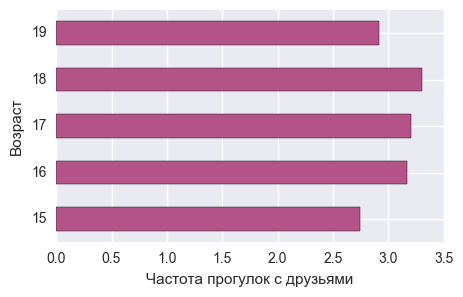

In [9]:
Teens.pivot_table('goout', 'Age').plot(kind='barh', figsize=(5,3), stacked=True,color='#b55489')
plt.xlabel('Частота прогулок с друзьями');
plt.ylabel('Возраст');

Примечатально, что все возрастные группы оценивают свое свободное время примерно одинаково, 18-летние - ниже всех. В то же время эти же 18-летние больше всех остальных возрастных групп гуляют с друзьями. Видимо, поэтому у них так мало свободного времени.

Опять у нас 15-летние и 19-летние имеют схожий результат. Думаю, 15-летних еще не всех гулять пускают, а 19-летние просто уже имеют дела поважнее, чем какие-то там гулянки.

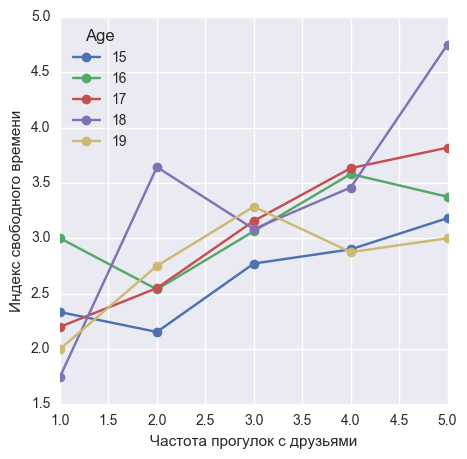

In [10]:
Teens.pivot_table('goout','freetime','Age').plot(marker='o',figsize=(5,5))
plt.ylabel('Индекс свободного времени');
plt.xlabel('Частота прогулок с друзьями');

У многих возрастных групп наблюдается весьма неоднозначная зависимость между количеством прогулок и свободного времени.


Построим общий тренд. 

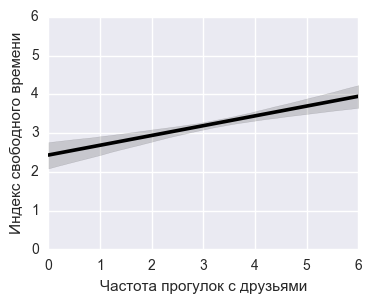

In [11]:
figure(figsize = (4,3), dpi=100) 
sns.regplot(x='goout', y='freetime',color='black',marker=False, data=Teens); 
plt.ylabel('Индекс свободного времени');
plt.xlabel('Частота прогулок с друзьями');
plt.show()

В среднем для всех опрошенных прослеживается явная положительная зависимость (больше свободного времени, больше гуляют).

Логичная отрицательная зависимость между свободным временем и учебой (даже тренд строить не пришлось):

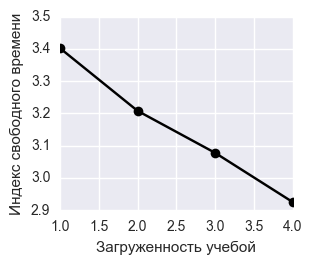

In [12]:
Teens.pivot_table('freetime', 'studytime').plot(marker='o',figsize=(3,2.5),color='black')
plt.ylabel('Индекс свободного времени');
plt.xlabel('Загруженность учебой');

Зависимость потребления молодежью алкоголя в будние и выходные дни положительная у всех возрастных групп. Если уж пьют, то и в выходные, и по будням! :)

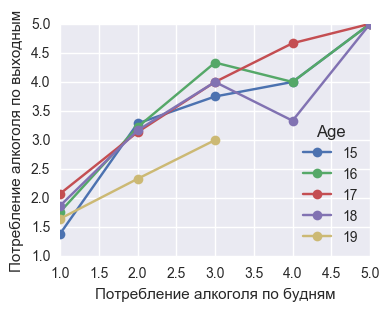

In [13]:
Teens.pivot_table('Walc','Dalc','Age').plot(marker='o',figsize=(4,3))
plt.ylabel('Потребление алкоголя по выходным');
plt.xlabel('Потребление алкоголя по будням');

Посмотрим, что с алкогольным потреблением в зависимости от загруженности учебой (наиболее интересный аспект, на мой взгляд, результаты интригуют)

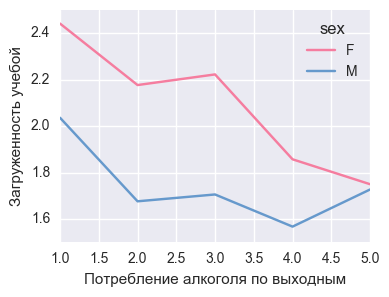

In [14]:
Teens.pivot_table('studytime','Walc', columns='sex').plot(color=('#f57d9f','#6699cc'),figsize=(4,3))
plt.ylabel('Загруженность учебой');
plt.xlabel('Потребление алкоголя по выходным');

Зависимость отрицательная. 

Внезапно.

Рассмотрим 4 группы опрошенных по загруженности учебой ( от 1 до 4) и посмотрим на потребление алкоголя в этих группах в зависимости от пола:

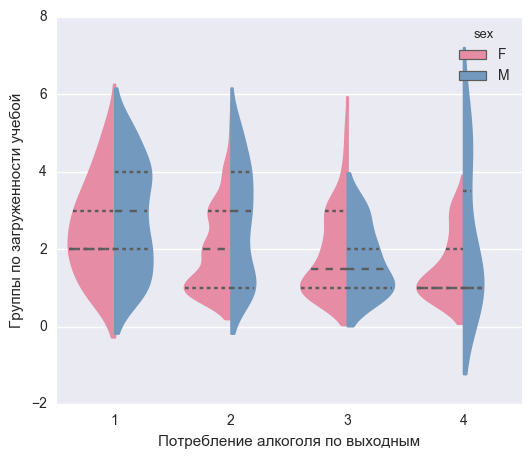

In [15]:
figure(figsize = (6,5), dpi=100) 
sns.violinplot(x="studytime", y="Walc", hue="sex", data=Teens, split=True,
               inner="quart", palette={'#f57d9f','#6699cc'})
sns.despine(right=True)

plt.xlabel('Потребление алкоголя по выходным')
plt.ylabel('Группы по загруженности учебой')

Очевидно, что медианное потребление алкоголя у мужчин, как минимум, не ниже женского (в наиболее загруженных группах они равны).С повышением загруженности у опрошенных снижается медианное потребление алкоголя, но у девушек в меньшей степени :)

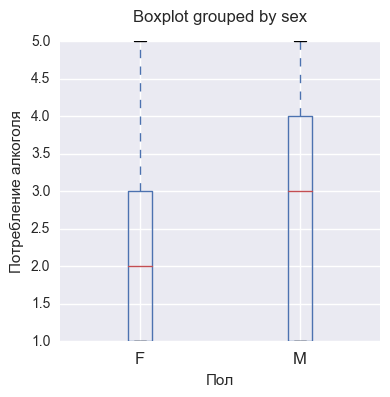

In [16]:
Teens.boxplot(column='Walc', by='sex',figsize=(4,4));
plt.ylabel('Потребление алкоголя');
plt.xlabel('Пол');
plt.title('')

По результатам опроса, мужчины в среднем пьют больше женщин (медиана выше), но и дисперсия ответов у них выше.

Плотность распределения здоровья опрошенных показывает, что большая их часть считают себя абсолютно здоровыми:

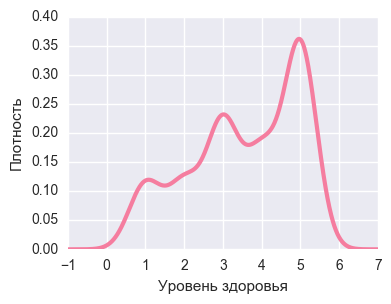

In [17]:
Teens['health'].plot(kind='kde', linewidth=3,figsize=(4,3), color='#f57d9f')
plt.ylabel('Плотность');
plt.xlabel('Уровень здоровья');

А еще тренд зависимости здоровья и потребления алкоголя слабо положительный. Но я допускаю, что просто молодой организм более устойчив к вреду от алкоголя, поэтому такой тренд. А те, кто имеют плохое здоровье, изначально пьют меньше.

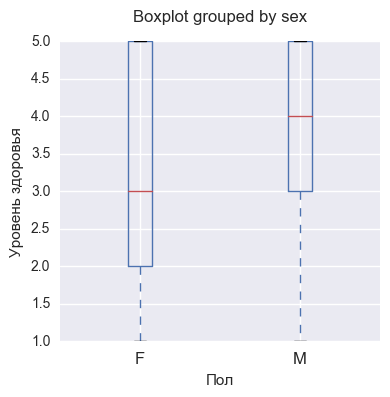

In [20]:
Teens.boxplot(column='health', by='sex',figsize=(4,4));
plt.ylabel('Уровень здоровья');
plt.xlabel('Пол');
plt.title("")

В завершение проверю достаточно насущную гипотезу о том, что алкоголь вредит здоровью наших опрошенных.

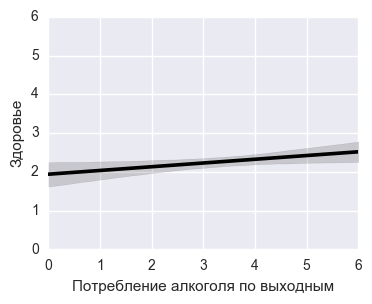

In [19]:
figure(figsize = (4,3), dpi=100) 
sns.regplot(x='health', y='Walc',color='black',marker=False, data=Teens); 
plt.ylabel('Здоровье');
plt.xlabel('Потребление алкоголя по выходным');
plt.show()

Ого! Тренд зависимости здоровья и потребления алкоголя слабо положительный. Но я допускаю, что просто молодой организм более устойчив к вреду от алкоголя, поэтому такой тренд. А те, кто имеют плохое здоровье, изначально пьют меньше.


### 2) Занудная симуляционная задача. 
Пусть $X_i$ независимы и равномерны на $[0;1]$.

Нарисуй гистограмму распределения для $X_1$, $X_1 + X_2 + X_3$, $\sum_{i=1}^{10} X_i$, $\sum_{i=1}^{50} X_i$

/Users/Filushina/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


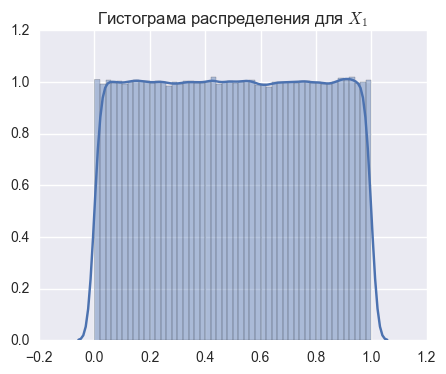

In [57]:
figure(figsize = (5,4)) 
X = stat.uniform(loc=0,scale=1)
M1 = X.rvs(1000000)

sns.plt.title('Гистограма распределения для $X_1$')
sns.distplot(M1)

/Users/Filushina/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


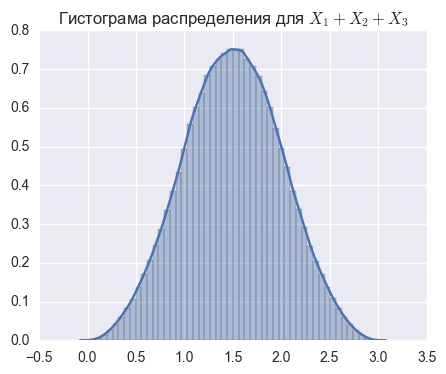

In [56]:
figure(figsize = (5,4)) 
M2 = X.rvs(1000000)
M3 = X.rvs(1000000)
sns.plt.title('Гистограма распределения для $X_1+X_2+X_3$')
sns.distplot(M1+M2+M3)

/Users/Filushina/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


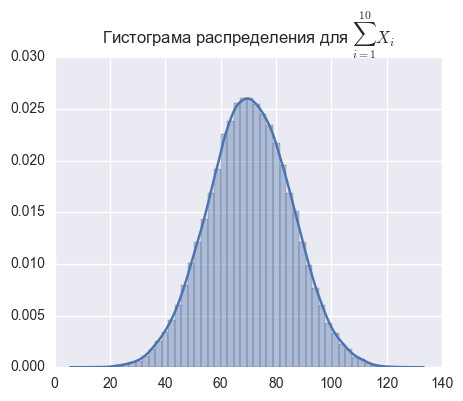

In [55]:
figure(figsize = (5,4)) 
TenM = np.empty(shape=100000)
for i in range(10):
    M10 = X.rvs(100000)
    TenM += M10
    
sns.plt.title('Гистограма распределения для $\sum_{i=1}^{10} X_i$', y=1.02)
sns.distplot(TenM)

/Users/Filushina/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


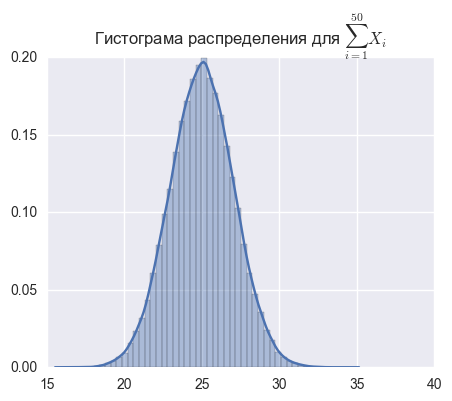

In [53]:
figure(figsize = (5,4)) 
FiftyM = np.empty(shape=100000)
for i in range(50):
    M50 = X.rvs(100000)
    FiftyM += M50
    
sns.plt.title('Гистограма распределения для $\sum_{i=1}^{50} X_i$', y=1.02)
sns.distplot(FiftyM)

Оцени $P(X1 + X2 + X3 > 2)$

In [34]:
S = M1+M2+M3
np.sum(S > 2) / 1000000

0.16691300000000001

Оцени $E(X_1^5)$

In [35]:
np.mean(M1 ** 5)

0.16689470679752713

Оцени $Var(X_1 / 1 + X_2^2)$

In [36]:
(M1 / (1 + M2 ** 2)).var()

0.059920831583778707

Оцени медиану

In [37]:

np.median((1 + M1) / (3 + M2))

0.42888830189226873

Оцени 25\%-ую квантиль для $(1+X_1) / (3 + X_2)$

In [38]:
np.percentile((1 + M1) / (3 + M2), q=25)

0.35724274019933433



###  Задача 44


Ветреная Машенька пишет романтические смс Андрею и Борису. Первое смс она пишет Андрею, второе — Борису и третье — Борису. Далее каждое следующее смс она пишет Андрею с вероятностью равной доле ранее отправленных Андрею смс. Всего за день Машенька отправила 100 смс.


##### Какова вероятность того, что четвёртое смс она напишет Борису?


$$X_n =\left\{\begin{array}{l} {1,\quad n-я\quad смс\quad отправлена\quad Борису\quad (это\quad же\quad успех!)} \\ {0,\quad иначе} \end{array}\right. $$

Т.к. вероятность написания смс Андрею равна доле предыдущих смс Андрею, то вероятность написания смс Борису равняется доле предыдущих смс, адресованных ему.

$P(X_4=1) = \frac{2}{3}$


##### Какова вероятность того, что 100-ое смс она напишет написано Борису?
$P(X_5=1) = \frac{2}{3}\cdot\frac{3}{4}+\frac{1}{3}\cdot\frac{2}{4} = C_{1}^{0}\cdot(\frac{2}{3})^{1}\cdot(\frac{1}{3})^0\cdot\frac{3}{4}+C_{1}^{1}\cdot(\frac{2}{3})^{0}\cdot(\frac{1}{3})^1\cdot\frac{2}{4}=\frac{2}{3}$

$P(X_6=1) = (\frac{2}{3})^2\cdot\frac{4}{5}+\frac{2}{3}\cdot\frac{1}{3}\cdot\frac{3}{5}\cdot 2 + (\frac{1}{3})^2\cdot\frac{2}{5} = \frac{3}{2} = C_{2}^{0}\cdot(\frac{2}{3})^{2}\cdot(\frac{1}{3})^0\cdot\frac{4}{5}+C_{2}^{1}\cdot(\frac{2}{3})^{1}\cdot(\frac{1}{3})^1\cdot\frac{3}{5}+C_{2}^{2}\cdot(\frac{2}{3})^{0}\cdot(\frac{1}{3})^{2}\cdot\frac{2}{5} = \frac{2}{3} $

...

$P(X_n=1) = \sum_{i=0}^{n-4} C_{n-4}^{i}\cdot(\frac{2}{3})^{n-4-i}\cdot(\frac{1}{3})^i\cdot\frac{n-2-i}{n-1} = \frac{2}{3}$

$P(X_{100}=1) = \sum_{i=0}^{96} C_{96}^{i}\cdot(\frac{2}{3})^{96-i}\cdot(\frac{1}{3})^i\cdot\frac{98-i}{99} = \frac{2}{3}$
##### Какова вероятность того, что последние три смс она напишет Борису?

Здесь важно учесть, что тот факт, что предыдущее смс написано Борису, будет влиять на вероятность следующего

$P(X_{98},X_{99},X_{100}=1) = \frac{2}{3}\cdot\frac{97\cdot\frac{2}{3}+1}{98}\cdot\frac{97\cdot\frac{2}{3}+2}{99}\approx 0.29$

##### Сколько в среднем смс она напишет Борису?

$E(X_1, X_2, ... , X_{100}) = E(X_1)+ E(X_2) + ... + E(X_{100}) = 100\cdot 1 \cdot \frac{2}{3} = \frac{200}{3}$

##### Какова вероятность того, что ровно 20 смс она напишет Борису?

$P( \sum_2^{21}X_n >= 20) = 1\cdot1\cdot\frac{2}{3}\cdot \frac{3}{4}\cdot \frac{4}{5}\cdot \frac{5}{6}\cdot...\cdot \frac{19}{20}
$

$P( \sum_1^{100}X_n = 20) = C_{97}^{18}\cdot1\cdot1\cdot\frac{2}{3}\cdot \frac{3}{4}\cdot \frac{4}{5}\cdot \frac{5}{6}\cdot...\cdot \frac{19}{20} \cdot \frac {1}{21}\cdot ... \cdot \frac{79}{99}= C_{97}^{18}\cdot\frac{19!\cdot79!}{99!}=\frac{19!\cdot79!\cdot97!}{99!\cdot18!\cdot79!}=\frac{19}{98\cdot99}=\frac{19}{9702}\approx 0.002
$
##### Какова вероятность того, что ровно $k$ смс она напишет Борису?
$P( \sum_1^{100}X_n = k) = C_{97}^{k-2}\cdot \frac{(k-1)!\cdot(100-k-1)!}{99!} = \frac{(k-1)!\cdot(99-k)!\cdot97!}{99!\cdot(99-k)!\cdot(k-2)!}=\frac{k-1}{9702}
$

##### Машенька продолжает писать смс Андрею и Борису, не остановившись на $n=100$. Она загадала, что если тысячу раз подряд напишет смс Борису, то выйдет за него замуж. Какова вероятность, того, что Машенька выйдет замуж за Бориса? Сколько в среднем смс всего до замужества она напишет?



$P(\sum_m^{m+999}X_n=1000) = 1\cdot1\cdot\frac{2}{3}\cdot\frac{3}{4}\cdot...\cdot\frac{998}{999}\cdot\frac{999}{1000}=\frac{1}{500}$

Маловато для замужества...



